![Medical Match company logo](MedicalMatch.svg)

### Problem Statement

**Business Context**:

RN turnover costs a hospital 56k per nurse. The avgerage annual cost of RN turnover is 4.8M per hospital. For every 20 travel RNs eliminated, the avg hospital can save 2M.

MedicalMatch is a medtech startup committed to revolutionizing healthcare staffing. As data scientist on their product solutions team, I am tasked with analyzing healthcare employee attrition data to quantify its financial impact on hospitals and clinics. This analysis will enable the marketing team to craft targeted campaigns promoting MedicalMatch’s innovative staffing solutions.


---


### Data Dictionary:

| Feature                     | Type     | Description                                              |
|-----------------------------|----------|----------------------------------------------------------|
| **age**                     | *int64*  | 1: >30, 2: 30-34, 3: 35-39, 4: 40-44, 5: 45-49, 6: 50-54, 7: 55-59, 8: 60-64, 9: 65|
| **attrition**               | *int64*  | Did the employee leave the hospital 0: No, 1: Yes       |
| **distancefromhome**        | *int64*  | Distance from home in minutes                            |
| **education**               | *int64*  | 1: High School/GED, 2: Trade/Associate, 3: Bachelor, 4: Master, 5: Doctorate |
| **environmentalsatisfaction** | *int64* | 1: Low, 2: Medium, 3: High, 4: Very High                |
| **gender**                  | *ogject*  | Female,  Male                                      |
| **hourlyrate**              | *float64*| Hourly pay per US BLS May 2024                          |
| **jobinvolvement**          | *int64*  | 1: Low, 2: Medium, 3: High, 4: Very High                |
| **jobrole**                 | *object* | Current job title                                       |
| **jobsatisfaction**         | *int64*  | 1: Low, 2: Medium, 3: High, 4: Very High                |
| **maritalstatus**           | *object* | Single, Married, Divorced                               |
| **monthlyincome**           | *float64*| Monthly pay per US BLS May 2024                         |
| **numcompaniesworked**      | *int64*  | Number of previous jobs                                 |
| **overtime**                | *int64*  | Did employee work overtime: No: 0, Yes: 1              |
| **percentsalaryhike**       | *int64*  | Percent of raise                                        |
| **performancerating**       | *int64*  | 1: Poor, 2: Good, 3: Excellent, 4: Outstanding          |
| **relationshipsatisfaction**| *int64*  | 1: Low, 2: Medium, 3: High, 4: Very High                |
| **shift**                   | *int64*  | Current shift. 1: 12 hr day, 2: 12 hr night, 3: 8 hr day, 4: 8 hr evening |
| **totalworkingyears**       | *int64*  | How many years employee has worked                      |
| **trainingtimeslastyear**   | *int64*  | How many training events employee had last year          |
| **worklifebalance**         | *int64*  | 1: Poor, 2: Moderate, 3: Good, 4: Excellent            |
| **yearsatcompany**          | *int64*  | Total years at current company                          |
| **yearsincurrentrole**      | *int64*  | Total years in current role                             |
| **yearssincelastpromotion** | *int64*  | Length of time in years since last promotion            |
| **yearswithcurrmanager**    | *int64*  | How long employee has been with the same manager        |




#### Project Datasets

Synthetic data taken from:
- https://excelbianalytics.com/wp/downloads-21-sample-csv-files-data-sets-for-testing-till-5-million-records-hr-analytics-for-attrition/ and modified to be applicable to hospital attrition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# load drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read in csv
health_attr = pd.read_csv('/content/drive/MyDrive/DSML/GA_DS/Projects/Project-Capstone/medical match option/data/final-healthcare.csv')
health_attr.head()

,age,attrition,distancefromhome,education,environmentsatisfaction,gender,hourlyrate,jobinvolvement,jobrole,jobsatisfaction,...,performancerating,relationshipsatisfaction,shift,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,6,0,1,5,3,Female,54.22,4,surgery RN,3,...,3,4,2,9,3,2,23,6,0,2
1,9,0,47,2,4,Female,16.15,3,CNA,2,...,1,4,4,5,3,4,1,1,1,1
2,1,0,45,2,3,Male,32.81,1,surgery tech,3,...,3,4,2,10,2,4,4,1,12,10
3,2,0,2,2,2,Female,39.08,3,ICU nurse,3,...,3,2,3,24,2,3,14,6,6,7
4,9,0,8,2,4,Male,67.04,3,ICU tech,3,...,4,3,1,15,3,4,6,3,3,7


In [ ]:
# drop empoyeecount column
# this columns simply says there's 1 employee p/row of data, useless
health_attr = health_attr.drop(columns=['employeecount'])

In [ ]:
# drop joblevel column
# NA
health_attr = health_attr.drop(columns=['joblevel'])

In [ ]:
# drop standardhours column
# this is indicating 40 hrs p/week and all columns have the same value
health_attr = health_attr.drop(columns=['standardhours'])

In [ ]:
# drop stockoptionlevel column
# not relevent to the healthcare industry
health_attr = health_attr.drop(columns=['stockoptionlevel'])

In [ ]:
health_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       60000 non-null  int64  
 1   attrition                 60000 non-null  int64  
 2   distancefromhome          60000 non-null  int64  
 3   education                 60000 non-null  int64  
 4   environmentsatisfaction   60000 non-null  int64  
 5   gender                    60000 non-null  object 
 6   hourlyrate                60000 non-null  float64
 7   jobinvolvement            60000 non-null  int64  
 8   jobrole                   60000 non-null  object 
 9   jobsatisfaction           60000 non-null  int64  
 10  maritalstatus             60000 non-null  object 
 11  monthlyincome             60000 non-null  float64
 12  numcompaniesworked        60000 non-null  int64  
 13  overtime                  60000 non-null  int64  
 14  percen

In [ ]:
# check gender values
health_attr['gender'].value_counts()

gender
Female    40470
Male      19530
Name: count, dtype: int64

**Age Values**

In [ ]:
health_attr['age'].value_counts(normalize=True)

age
3    0.142783
9    0.139333
2    0.136950
5    0.116617
8    0.115267
7    0.112150
4    0.111633
6    0.086633
1    0.038633
Name: proportion, dtype: float64

**Observations:**
These values show bias in the dataset as the highest age value is only 59 and 25.8% of all nurses are 60+ yrs old and 32% of doctors are 60+. The accurate age distribution of regustered nurses can be found here: https://bhw.hrsa.gov/data-research/access-data-tools/national-sample-survey-registered-nurses/detailed-description-rn-by-age.

In [ ]:
import random
# change age values to map to grouped ages with values from 1-9
# see updated data dictionary for the definition of each group

# generate random numbers between 1 and 9 (inclusive)
generate_random_age = lambda age: random.randint(1, 9)

# apply the function to the 'age' column and save the changes back to the original column
health_attr['age'] = health_attr['age'].apply(generate_random_age)

In [5]:
# this isn't perfect, but it's better
health_attr['age'].value_counts(normalize=True)

age
3    0.142783
9    0.139333
2    0.136950
5    0.116617
8    0.115267
7    0.112150
4    0.111633
6    0.086633
1    0.038633
Name: proportion, dtype: float64

**Attrition value counts**

In [ ]:
# check attrition values
health_attr['attrition'].value_counts()

attrition
0    48000
1    12000
Name: count, dtype: int64

In [ ]:
# make gender column binary values
health_attr['attrition'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [6]:
# check the age attrition value ratios
counts = health_attr.groupby(['age','attrition']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
percentages

attrition,0,1
age,,
1,83.218292,16.781708
2,81.586954,18.413046
3,82.000700,17.999300
4,81.263064,18.736936
5,81.563527,18.436473
6,80.396306,19.603694
7,81.304800,18.695200
8,80.653557,19.346443
9,81.100478,18.899522


In [7]:
# Fix age/attrition value ratios

# desired attrition ratios per age category
desired_ratios = {
    1: 0.305,
    2: 0.211,
    3: 0.102,
    4: 0.101,
    5: 0.092,
    6: 0.115,
    7: 0.171,
    8: 0.253,
    9: 0.295
}

# Function to adjust attrition ratios per age category
def adjust_attrition_ratios(df, age_col, attrition_col, desired_ratios):
    new_attrition = df[attrition_col].copy()

    for age, group in df.groupby(age_col):
        current_attrition = group[attrition_col].values
        current_count = len(current_attrition)
        desired_count = int(current_count * desired_ratios[age])

        # Create new attrition values based on the desired ratio
        new_attrition_values = np.array([1] * desired_count + [0] * (current_count - desired_count))
        np.random.shuffle(new_attrition_values)

        # Assign new attrition values to the corresponding indices
        new_attrition.loc[group.index] = new_attrition_values

    # Assign new attrition values back to the dataframe
    df[attrition_col] = new_attrition

# Apply the function to adjust attrition ratios
adjust_attrition_ratios(health_attr, 'age', 'attrition', desired_ratios)

# Verify the new ratios
print(health_attr.groupby('age')['attrition'].mean())

age
1    0.304573
2    0.210904
3    0.101903
4    0.100926
5    0.091897
6    0.114852
7    0.170902
8    0.252892
9    0.294976
Name: attrition, dtype: float64


In [8]:
# varify the correction
counts = health_attr.groupby(['age','attrition']).size().unstack()
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
percentages

attrition,0,1
age,,
1,69.542709,30.457291
2,78.909578,21.090422
3,89.809735,10.190265
4,89.907435,10.092565
5,90.810347,9.189653
6,88.514813,11.485187
7,82.909793,17.090207
8,74.710816,25.289184
9,70.502392,29.497608


In [ ]:
# desired attrition ratios per job role category
# per NSI National Health Care Retention Report
desired_attrition_ratios = {
    'ICU tech': 0.194,
    'ED nurse': 0.224,
    'surgery RN': 0.1765,
    'ICU Dr': 0.076,
    'CNA': 0.41,
    'surgeon': 0.076,
    'pharmacist': 0.107,
    'surgery tech': 0.1765,
    'ED tech': 0.224
}

# Function to adjust attrition ratios per job role category
def adjust_attrition_ratios_by_jobrole(df, jobrole_col, attrition_col, desired_ratios):
    for jobrole, ratio in desired_ratios.items():
        group = df[df[jobrole_col] == jobrole]
        current_count = len(group)
        desired_count = int(current_count * ratio)

        # Current attrition values
        current_attrition = group[attrition_col].values

        # Create new attrition values based on the desired ratio
        new_attrition_values = np.array([1] * desired_count + [0] * (current_count - desired_count))
        np.random.shuffle(new_attrition_values)

        # Assign new attrition values to the corresponding indices
        df.loc[group.index, attrition_col] = new_attrition_values

# Apply the function to adjust attrition ratios
adjust_attrition_ratios_by_jobrole(health_attr, 'jobrole', 'attrition', desired_attrition_ratios)

# Verify the new ratios
print(health_attr.groupby('jobrole')['attrition'].mean())

jobrole
CNA             0.409880
ED nurse        0.223893
ED tech         0.223896
ICU Dr          0.075968
ICU nurse       0.197120
ICU tech        0.193916
pharmacist      0.106999
surgeon         0.075935
surgery RN      0.176362
surgery tech    0.176411
Name: attrition, dtype: float64


In [ ]:
# Define desired attrition ratios per education level
desired_attrition_ratios_education = {
    1: 0.39,
    2: 0.202,
    3: 0.224,
    4: 0.1765,
    5: 0.096
}

# Function to adjust attrition ratios per education level
def adjust_attrition_ratios_by_education(df, education_col, attrition_col, desired_ratios):
    for education, ratio in desired_ratios.items():
        group = df[df[education_col] == education]
        current_count = len(group)
        desired_count = int(current_count * ratio)

        # Current attrition values
        current_attrition = group[attrition_col].values

        # Create new attrition values based on the desired ratio
        new_attrition_values = np.array([1] * desired_count + [0] * (current_count - desired_count))
        np.random.shuffle(new_attrition_values)

        # Assign new attrition values to the corresponding indices
        df.loc[group.index, attrition_col] = new_attrition_values

# Apply the function to adjust attrition ratios by education
adjust_attrition_ratios_by_education(health_attr, 'education', 'attrition', desired_attrition_ratios_education)

# Verify the new ratios
print(health_attr.groupby('education')['attrition'].mean())

education
1    0.389931
2    0.201988
3    0.223955
4    0.176324
5    0.095984
Name: attrition, dtype: float64


In [ ]:
# attrition ratios per years at company
desired_attrition_ratios_by_years = {
    1: 0.34,
    2: 0.23,
    3: 0.23,
    4: 0.21,
    5: 0.21,
    6: 0.119,
    7: 0.119,
    8: 0.119,
    9: 0.119,
    10: 0.119,
    11: 0.099,
    12: 0.099,
    13: 0.099,
    14: 0.099,
    15: 0.099,
    16: 0.099,
    17: 0.099,
    18: 0.099,
    19: 0.099,
    20: 0.099,
    21: 0.099,
    22: 0.099,
    23: 0.099,
    24: 0.099,
    25: 0.099,
    26: 0.099,
    27: 0.099,
    28: 0.099,
    29: 0.099,
    30: 0.099,
    31: 0.099,
    32: 0.099,
    33: 0.099,
    34: 0.099,
    35: 0.099
    # Add more years as needed
}

# Function to adjust attrition ratios per years at company
def adjust_attrition_ratios_by_years(df, years_col, attrition_col, desired_ratios):
    for years, ratio in desired_ratios.items():
        group = df[df[years_col] == years]
        current_count = len(group)
        desired_count = int(current_count * ratio)

        # Current attrition values
        current_attrition = group[attrition_col].values

        # Create new attrition values based on the desired ratio
        new_attrition_values = np.array([1] * desired_count + [0] * (current_count - desired_count))
        np.random.shuffle(new_attrition_values)

        # Assign new attrition values to the corresponding indices
        df.loc[group.index, attrition_col] = new_attrition_values

# Apply the function to adjust attrition ratios
adjust_attrition_ratios_by_years(health_attr, 'yearsatcompany', 'attrition', desired_attrition_ratios_by_years)

# Verify the new ratios
print(health_attr.groupby('yearsatcompany')['attrition'].mean())

yearsatcompany
1     0.339932
2     0.229947
3     0.229943
4     0.209806
5     0.210000
6     0.118737
7     0.118656
8     0.118704
9     0.118914
10    0.118839
11    0.098901
12    0.098739
13    0.098992
14    0.098848
15    0.098965
16    0.098983
17    0.098731
18    0.098387
19    0.098237
20    0.098992
21    0.098814
22    0.098925
23    0.098698
24    0.098644
25    0.098338
26    0.098039
27    0.097521
28    0.098170
29    0.097959
30    0.098081
31    0.097156
32    0.096606
33    0.096491
34    0.095847
35    0.098814
36    0.217593
37    0.176101
38    0.216495
39    0.115942
40    0.257143
Name: attrition, dtype: float64


#### Overtime value counts

In [ ]:
# get overtime values
health_attr['overtime'].value_counts()

overtime
0    30155
1    29845
Name: count, dtype: int64

In [ ]:
# make overtime column binary values
health_attr['overtime'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [ ]:
# verify correction
health_attr['overtime'].value_counts()

overtime
0    30155
1    29845
Name: count, dtype: int64

#### Shift value counts

In [ ]:
# check shift values
health_attr['shift'].value_counts()

shift
4    15123
2    14999
3    14985
1    14893
Name: count, dtype: int64

In [ ]:
health_attr['education'].value_counts()

education
5    27348
3    14542
4     7875
2     5169
1     5066
Name: count, dtype: int64

**Job role value counts**

In [ ]:
# check jobrole values
health_attr['jobrole'].value_counts()

jobrole
ED nurse        6119
ICU tech        6049
ICU nurse       6042
ICU Dr          6042
CNA             5992
surgeon         5992
pharmacist      5972
surgery RN      5965
surgery tech    5918
ED tech         5909
Name: count, dtype: int64

### Fix Jobrole Education Ratios

In [ ]:
def assign_education(dataframe, job_role, education_value, education_percentage):
    # Get the index of every jobrole for a specific value
    index_list = list(dataframe[dataframe['jobrole'] == job_role].index)
    random.shuffle(index_list)

    # Create a list of education values based on the percentage
    num_education_rows = int(len(index_list) * education_percentage)
    list_of_education = [education_value] * num_education_rows + [other_value for other_value in range(1, 6) if other_value != education_value]

    # Assign education values to corresponding indices
    for index, education in zip(index_list, list_of_education):
        dataframe.at[index, 'education'] = education

    # Calculate the new education ratios
    new_education_ratios = dataframe[dataframe['jobrole'] == job_role]['education'].value_counts(normalize=True)
    print("New education ratios for job role {} and education value {}: {}".format(job_role, education_value, new_education_ratios))

**Fix ICU RN Education Ratios**

In [ ]:
# adjust ICU RN education %
assign_education(health_attr, 'ICU nurse', 3, 0.10)

New education ratios for job role ICU nurse and education value 3: education
3    0.455644
2    0.209699
4    0.147799
1    0.121483
5    0.065376
Name: proportion, dtype: float64


**Fix ED RN Education Ratios**

In [ ]:
# adjust ICU RN education %
assign_education(health_attr, 'ED nurse', 1, 0.08)

New education ratios for job role ED nurse and education value 1: education
3    0.437980
4    0.207060
2    0.205426
1    0.082040
5    0.067495
Name: proportion, dtype: float64


**Fix Surgery RN Education Ratios**

In [ ]:
# adjust ICU RN education %
assign_education(health_attr, 'ED nurse', 3, 0.05)

New education ratios for job role ED nurse and education value 3: education
3    0.437490
2    0.290570
4    0.143978
1    0.091028
5    0.036934
Name: proportion, dtype: float64


**Fix CNA/TECH Education Ratios**

In [ ]:
# adjust CNA education #
assign_education(health_attr, 'CNA', 2, .20)

New education ratios for job role CNA and education value 2: education
2    0.655874
1    0.341121
5    0.001335
4    0.001001
3    0.000668
Name: proportion, dtype: float64


In [ ]:
# adjust surgery tech education #
assign_education(health_attr, 'surgery tech', 1, .10)

New education ratios for job role surgery tech and education value 1: education
2    0.794863
1    0.159851
3    0.016898
4    0.014701
5    0.013687
Name: proportion, dtype: float64


In [ ]:
# adjust ICU tech education #
assign_education(health_attr, 'ICU tech', 2, .10)

New education ratios for job role ICU tech and education value 2: education
2    0.813192
1    0.100512
3    0.035212
4    0.030253
5    0.020830
Name: proportion, dtype: float64


In [ ]:
# adjust ED tech education #
assign_education(health_attr, 'ED tech', 4, .01)

New education ratios for job role ED tech and education value 4: education
2    0.900152
1    0.058216
4    0.018277
5    0.012693
3    0.010662
Name: proportion, dtype: float64


**Fix Dr Education values**

In [ ]:
# change education values for 'ICU Dr', 'surgeon', 'pharmacist'
# Filter rows where jobrole is 'ICU Dr', 'surgeon', or 'pharmacist'
filtered_rows = health_attr[health_attr['jobrole'].isin(['ICU Dr', 'surgeon', 'pharmacist'])]

# update the 'education' column for the filtered rows to 5
health_attr.loc[filtered_rows.index, 'education'] = 5

### Salary Section

##### ED nurse pay section

In [ ]:
# what is the monthlyincome of jobroles == ED nurse
print(health_attr[health_attr['jobrole'] == 'ED nurse']['monthlyincome'].min())
print(health_attr[health_attr['jobrole'] == 'ED nurse']['monthlyincome'].max())

4033.03
8495.94


In [ ]:
# what is the hourlyrate of jobroles == ED nurse
print(health_attr[health_attr['jobrole'] == 'ED nurse']['hourlyrate'].min())
print(health_attr[health_attr['jobrole'] == 'ED nurse']['hourlyrate'].max())

28.01
59.0


##### ICU tech pay section

In [ ]:
# what is the monthlyincome of jobroles == ICU tech
print(health_attr[health_attr['jobrole'] == 'ICU tech']['monthlyincome'].min())
print(health_attr[health_attr['jobrole'] == 'ICU tech']['monthlyincome'].max())

2670.2
13290.93


In [ ]:
# what is the hourlyrate of jobroles == ICU tech
print(health_attr[health_attr['jobrole'] == 'ICU tech']['hourlyrate'].min())
print(health_attr[health_attr['jobrole'] == 'ICU tech']['hourlyrate'].max())

15.39
76.68


##### ICU nurse pay section

In [ ]:
# what is the monthlyincome of jobroles == ICU nurse
print(health_attr[health_attr['jobrole'] == 'ICU nurse']['monthlyincome'].min())
print(health_attr[health_attr['jobrole'] == 'ICU nurse']['monthlyincome'].max())

3941.24
10847.83


In [ ]:
# what is the hourlyrate of jobroles == ICU nurse
print(health_attr[health_attr['jobrole'] == 'ICU nurse']['hourlyrate'].min())
print(health_attr[health_attr['jobrole'] == 'ICU nurse']['hourlyrate'].max())

27.38
75.32


##### ICU Dr pay section

In [ ]:
# what is the monthlyincome of jobroles == ICU dr
print(health_attr[health_attr['jobrole'] == 'ICU Dr']['monthlyincome'].min())
print(health_attr[health_attr['jobrole'] == 'ICU Dr']['monthlyincome'].max())

4195.35
29002.16


In [ ]:
# what is the hourlyrate of jobroles == ICU dr
print(health_attr[health_attr['jobrole'] == 'ICU Dr']['hourlyrate'].min())
print(health_attr[health_attr['jobrole'] == 'ICU Dr']['hourlyrate'].max())

33.72
167.35


##### CNA pay section

In [ ]:
# what is the monthlyincome of jobroles == CNA
print(health_attr[health_attr['jobrole'] == 'CNA']['monthlyincome'].min())
print(health_attr[health_attr['jobrole'] == 'CNA']['monthlyincome'].max())

1707.03
5227.1


In [ ]:
# what is the hourlyrate of jobroles == CNA
print(health_attr[health_attr['jobrole'] == 'CNA']['hourlyrate'].min())
print(health_attr[health_attr['jobrole'] == 'CNA']['hourlyrate'].max())

9.86
27.7


##### surgeon pay section

In [ ]:
# what is the monthlyincome of jobroles == surgeon
print(health_attr[health_attr['jobrole'] == 'surgeon']['monthlyincome'].min())
print(health_attr[health_attr['jobrole'] == 'surgeon']['monthlyincome'].max())

17439.27
24893.77


In [ ]:
# what is the hourlyrate of jobroles == surgeon
print(health_attr[health_attr['jobrole'] == 'surgeon']['hourlyrate'].min())
print(health_attr[health_attr['jobrole'] == 'surgeon']['hourlyrate'].max())

133.02
189.98


##### pharmacist pay section

In [ ]:
# what is the monthlyincome of jobroles == pharmacist
print(health_attr[health_attr['jobrole'] == 'pharmacist']['monthlyincome'].min())
print(health_attr[health_attr['jobrole'] == 'pharmacist']['monthlyincome'].max())

7503.81
14052.4


In [ ]:
# what is the hourlyrate of jobroles == pharmacist
print(health_attr[health_attr['jobrole'] == 'pharmacist']['hourlyrate'].min())
print(health_attr[health_attr['jobrole'] == 'pharmacist']['hourlyrate'].max())

43.28
81.08


##### surgery RN pay section

In [ ]:
# what is the monthlyincome of jobroles == surgery RN
print(health_attr[health_attr['jobrole'] == 'surgery RN']['monthlyincome'].min())
print(health_attr[health_attr['jobrole'] == 'surgery RN']['monthlyincome'].max())

3550.22
13726.01


In [ ]:
# what is the hourlyrate of jobroles == surgery RN
print(health_attr[health_attr['jobrole'] == 'surgery RN']['hourlyrate'].min())
print(health_attr[health_attr['jobrole'] == 'surgery RN']['hourlyrate'].max())

22.13
75.86


##### surgery tech pay section

In [ ]:
# what is the monthlyincome of jobroles == surgery tech
print(health_attr[health_attr['jobrole'] == 'surgery tech']['monthlyincome'].min())
print(health_attr[health_attr['jobrole'] == 'surgery tech']['monthlyincome'].max())

3386.6
6926.54


In [ ]:
# what is the hourlyrate of jobroles == surgery tech
print(health_attr[health_attr['jobrole'] == 'surgery tech']['hourlyrate'].min())
print(health_attr[health_attr['jobrole'] == 'surgery tech']['hourlyrate'].max())

19.55
65.86


##### ED tech pay section

In [ ]:
# what is the monthlyincome of jobroles == ED tech
print(health_attr[health_attr['jobrole'] == 'ED tech']['monthlyincome'].min())
print(health_attr[health_attr['jobrole'] == 'ED tech']['monthlyincome'].max())

2112.57
10285.73


In [ ]:
# what is the hourlyrate of jobroles == ED tech
print(health_attr[health_attr['jobrole'] == 'ED tech']['hourlyrate'].min())
print(health_attr[health_attr['jobrole'] == 'ED tech']['hourlyrate'].max())

20.6
62.29


### Correcting gender ratios to reflect current trends

#### Get Gender Counts

In [ ]:
def get_gender_counts(df, job_role):
    """
    Filter the DataFrame by job role and return the value counts for each gender in that role.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - job_role (str): The job role to filter by.

    Returns:
    - counts (Series): The value counts for each gender in the specified job role.
    """
    # Filter the DataFrame by job role
    filtered_df = df[df['jobrole'] == job_role]

    # Get the value counts for each gender
    counts = filtered_df['gender'].value_counts(normalize=True)

    # Return the value counts
    return counts

In [ ]:
# Get and print gender counts for the 'ICU nurse' job role
get_gender_counts(health_attr, 'ICU nurse')

gender
0    0.506951
1    0.493049
Name: proportion, dtype: float64

In [ ]:
# Get and print gender counts for the 'ED nurse' job role
get_gender_counts(health_attr, 'ED nurse')

gender
1    0.500735
0    0.499265
Name: proportion, dtype: float64

In [ ]:
# Get and print gender counts for the 'surgery RN' job role
get_gender_counts(health_attr, 'surgery RN')

gender
0    0.500419
1    0.499581
Name: proportion, dtype: float64

In [ ]:
# this function calculates based on the gender == 1
def assign_gender(dataframe, job_role, gender_percentage):
    # Get the index of every jobrole for a specific value
    index_list = list(dataframe[dataframe['jobrole'] == job_role].index)
    random.shuffle(index_list)

    # Create a list of genders based on the percentage
    num_zeros = int(len(index_list) * (1 - gender_percentage))
    list_of_genders = [0] * num_zeros + [1] * (len(index_list) - num_zeros)

    # Assign genders to corresponding indices
    for index, gender in zip(index_list, list_of_genders):
        dataframe.at[index, 'gender'] = gender

    # Calculate the new gender ratios
    new_gender_ratios = dataframe[dataframe['jobrole'] == job_role]['gender'].value_counts(normalize=True)
    print("New gender ratios for job role {}: {}".format(job_role, new_gender_ratios))

#### Fix Nurse Gender Ratios

In [ ]:
# update ED nurse ratio
assign_gender(health_attr, 'ED nurse', 0.14)

New gender ratios for job role ED nurse: gender
0    0.856349
1    0.143651
Name: proportion, dtype: float64


In [ ]:
# update ICU nurse ratio
assign_gender(health_attr, 'ICU nurse', 0.14)

New gender ratios for job role ICU nurse: gender
0    0.854187
1    0.145813
Name: proportion, dtype: float64


In [ ]:
# update surgery RN ratio
assign_gender(health_attr, 'surgery RN', 0.14)

New gender ratios for job role surgery RN: gender
0    0.85482
1    0.14518
Name: proportion, dtype: float64


#### Fix Dr Gender Ratios

In [ ]:
# update surgeon ratio
assign_gender(health_attr, 'surgeon', 0.63)

New gender ratios for job role surgeon: gender
1    0.637183
0    0.362817
Name: proportion, dtype: float64


In [ ]:
# update pharmacist ratio
assign_gender(health_attr, 'pharmacist', 0.41)

New gender ratios for job role pharmacist: gender
0    0.581547
1    0.418453
Name: proportion, dtype: float64


In [ ]:
# update ICU Dr ratio
assign_gender(health_attr, 'ICU Dr', 0.63)

New gender ratios for job role ICU Dr: gender
1    0.638696
0    0.361304
Name: proportion, dtype: float64


#### Fix Technician Gender Ratios

In [ ]:
# update ICU Tech ratio
assign_gender(health_attr, 'ICU tech', 0.32)

New gender ratios for job role ICU tech: gender
0    0.672012
1    0.327988
Name: proportion, dtype: float64


In [ ]:
# update ED Tech ratio
assign_gender(health_attr, 'ED tech', 0.32)

New gender ratios for job role ED tech: gender
0    0.672872
1    0.327128
Name: proportion, dtype: float64


In [ ]:
# update surgery Tech ratio
assign_gender(health_attr, 'surgery tech', 0.32)

New gender ratios for job role surgery tech: gender
0    0.674383
1    0.325617
Name: proportion, dtype: float64


#### Fix CNA Gender Ratios

In [ ]:
# update CNA ratio
assign_gender(health_attr, 'CNA', 0.11)

New gender ratios for job role CNA: gender
0    0.886348
1    0.113652
Name: proportion, dtype: float64


In [ ]:
# check gender column value counts
health_attr['gender'].value_counts(normalize=True)

gender
0    0.6745
1    0.3255
Name: proportion, dtype: float64

In [ ]:
# Group by 'gender' and 'attrition', then count the occurrences
attrition_counts = health_attr.groupby(['gender', 'attrition']).size().reset_index(name='counts')

# Print the resulting DataFrame
print(attrition_counts)

   gender  attrition  counts
0  Female          0   33367
1  Female          1    7103
2    Male          0   16077
3    Male          1    3453


In [ ]:
# Calculate the percentages
total_counts = attrition_counts.groupby('gender')['counts'].transform('sum')
attrition_counts['counts'] / total_counts * 100

0    82.448727
1    17.551273
2    82.319508
3    17.680492
Name: counts, dtype: float64

In [ ]:
# Define desired attrition ratios per gender category
desired_gender_ratios = {
    'Male': 0.24,
    'Female': 0.18
}

# Function to adjust attrition ratios per gender category
def adjust_attrition_ratios_by_gender(df, gender_col, attrition_col, desired_ratios):
    for gender, group in df.groupby(gender_col):
        current_count = len(group)
        desired_count = int(current_count * desired_ratios[gender])

        # Create new attrition values based on the desired ratio
        new_attrition_values = np.array([1] * desired_count + [0] * (current_count - desired_count))
        np.random.shuffle(new_attrition_values)

        # Assign new attrition values to the corresponding indices
        df.loc[group.index, attrition_col] = new_attrition_values

# Apply the function to adjust attrition ratios
adjust_attrition_ratios_by_gender(health_attr, 'gender', 'attrition', desired_gender_ratios)

# Verify the new ratios
print(health_attr.groupby('gender')['attrition'].mean())

gender
Female    0.179985
Male      0.239990
Name: attrition, dtype: float64


In [ ]:
# Verify the new ratios
attrition_counts = health_attr.groupby(['gender', 'attrition']).size().reset_index(name='counts')
total_counts = attrition_counts.groupby('gender')['counts'].transform('sum')
attrition_counts['percentage'] = attrition_counts['counts'] / total_counts * 100
print(attrition_counts)

   gender  attrition  counts  percentage
0  Female          0   33186   82.001483
1  Female          1    7284   17.998517
2    Male          0   14843   76.001024
3    Male          1    4687   23.998976


#### Marital Status Section

In [ ]:
# maritalstatus values for each jobrole type
health_attr.groupby('jobrole')['maritalstatus'].value_counts(normalize= True)

jobrole       maritalstatus
CNA           Married          0.569092
              Divorced         0.378338
              Single           0.052570
ED nurse      Married          0.511848
              Divorced         0.405295
              Single           0.082857
ED tech       Married          0.561178
              Divorced         0.386867
              Single           0.051955
ICU Dr        Married          0.827706
              Divorced         0.164019
              Single           0.008275
ICU nurse     Single           0.343595
              Married          0.330851
              Divorced         0.325554
ICU tech      Married          0.561746
              Divorced         0.387337
              Single           0.050918
pharmacist    Married          0.683691
              Divorced         0.282820
              Single           0.033490
surgeon       Married          0.781709
              Divorced         0.206442
              Single           0.011849
surgery RN  

In [ ]:
# Define desired marital status ratios per job role category
desired_marital_ratios = {
    'ICU tech': {'Divorced': 0.25, 'Married': 0.6, 'Single': 0.15},
    'ED nurse': {'Divorced': 0.25, 'Married': 0.6, 'Single': 0.15},
    'surgery RN': {'Divorced': 0.25, 'Married': 0.6, 'Single': 0.15},
    'ICU Dr': {'Divorced': 0.10, 'Married': 0.85, 'Single': 0.05},
    'CNA': {'Divorced': 0.25, 'Married': 0.6, 'Single': 0.15},
    'surgeon': {'Divorced': 0.10, 'Married': 0.85, 'Single': 0.05},
    'pharmacist': {'Divorced': 0.15, 'Married': 0.74, 'Single': 0.11},
    'surgery tech': {'Divorced': 0.25, 'Married': 0.60, 'Single': 0.15},
    'ED tech': {'Divorced': 0.25, 'Married': 0.6, 'Single': 0.15}
}

# Function to adjust marital status ratios per job role category
def adjust_marital_ratios_by_jobrole(df, jobrole_col, maritalstatus_col, desired_ratios):
    for jobrole, status_ratios in desired_ratios.items():
        for maritalstatus, ratio in status_ratios.items():
            current_count = len(df[(df[jobrole_col] == jobrole) & (df[maritalstatus_col] == maritalstatus)])
            desired_count = int(current_count * ratio)

            # Select rows with the specific job role and marital status
            rows_to_adjust = df[(df[jobrole_col] == jobrole) & (df[maritalstatus_col] == maritalstatus)].sample(frac=1).index[:current_count - desired_count]

            # Set the marital status to the opposite of the desired ratio
            df.loc[rows_to_adjust, maritalstatus_col] = np.random.choice([val for val in status_ratios.keys() if val != maritalstatus], size=len(rows_to_adjust))

# Apply the function to adjust marital status ratios
adjust_marital_ratios_by_jobrole(health_attr, 'jobrole', 'maritalstatus', desired_marital_ratios)

# Verify the new ratios
print(health_attr.groupby(['jobrole', 'maritalstatus']).size())

jobrole       maritalstatus
CNA           Divorced         2267
              Married          3410
              Single            315
ED nurse      Divorced         2480
              Married          3132
              Single            507
ED tech       Divorced         2286
              Married          3316
              Single            307
ICU Dr        Divorced          991
              Married          5001
              Single             50
ICU nurse     Divorced         1967
              Married          1999
              Single           2076
ICU tech      Divorced         2343
              Married          3398
              Single            308
pharmacist    Divorced         1689
              Married          4083
              Single            200
surgeon       Divorced         1237
              Married          4684
              Single             71
surgery RN    Divorced         2416
              Married          3057
              Single            492


In [ ]:
# what does the marital status column look like
health_attr['maritalstatus'].value_counts()

maritalstatus
Married     35394
Divorced    19954
Single       4652
Name: count, dtype: int64

In [ ]:
# what percent of jobrole values of Ed nurse, ICU nurse, surgery RN have maritalstatus == Divorced
# checking synthetic data accuracy
divorced_nurses = health_attr[(health_attr['jobrole'].isin(['ED nurse', 'ICU nurse', 'surgery RN'])) & (health_attr['maritalstatus'] == 'Divorced')]
total_nurses = health_attr[health_attr['jobrole'].isin(['ED nurse', 'ICU nurse', 'surgery RN'])]
percent_divorced = (len(divorced_nurses) / len(total_nurses)) * 100
print(f"{percent_divorced:.2f}% of nurses are divorced.")

37.86% of nurses are divorced.


In [ ]:
# what percent of jobrole values of 'ICU Dr', 'surgeon', 'pharmacist' have maritalstatus  == 'Divorced'
# checking synthetic data accuracy
divorced_medical_professionals = health_attr[(health_attr['jobrole'].isin(['ICU Dr', 'surgeon', 'pharmacist'])) & (health_attr['maritalstatus'] == 'Divorced')]
total_medical_professionals = health_attr[health_attr['jobrole'].isin(['ICU Dr', 'surgeon', 'pharmacist'])]
divorced_percent = (len(divorced_medical_professionals) / len(total_medical_professionals)) * 100
print(f"{divorced_percent:.2f}% of doctors are divorced.")

21.75% of doctors are divorced.


#### Total Working Years Section

In [ ]:
health_attr['totalworkingyears'].value_counts(normalize=True)

totalworkingyears
40    0.026100
35    0.026050
32    0.025950
27    0.025933
2     0.025783
3     0.025783
14    0.025683
16    0.025667
20    0.025617
26    0.025517
12    0.025467
5     0.025433
37    0.025350
18    0.025233
11    0.025117
4     0.025000
23    0.025000
1     0.025000
39    0.024983
29    0.024967
28    0.024917
24    0.024883
38    0.024850
15    0.024833
13    0.024817
30    0.024767
33    0.024767
7     0.024683
8     0.024667
9     0.024617
6     0.024600
34    0.024583
31    0.024550
17    0.024417
21    0.024417
22    0.024283
19    0.024217
36    0.023933
10    0.023900
25    0.023667
Name: proportion, dtype: float64

In [ ]:
def adjust_column_ratios(dataframe, column_name, target_value, target_percentage):
    # Get the index of all rows in the dataframe
    index_list = list(dataframe.index)
    random.shuffle(index_list)

    # Calculate the number of rows to be adjusted based on the percentage
    num_adjusted_rows = int(len(index_list) * target_percentage)

    # Create a list of target values based on the percentage
    adjusted_values = [target_value] * num_adjusted_rows + \
                      [other_value for other_value in dataframe[column_name].unique() if other_value != target_value]

    # Assign adjusted values to corresponding indices
    for index, value in zip(index_list[:num_adjusted_rows], adjusted_values):
        dataframe.at[index, column_name] = value

    # Calculate the new ratios
    new_value_ratios = dataframe[column_name].value_counts(normalize=True)
    print("New value ratios for {} column with target value {}: {}".format(column_name, target_value, new_value_ratios))

#### Distance From Home Section

In [ ]:
health_attr['distancefromhome'].value_counts(normalize= True)

distancefromhome
25    0.021617
24    0.021600
32    0.021133
34    0.020783
18    0.020650
13    0.020517
21    0.020483
20    0.020417
27    0.020400
40    0.020383
10    0.020383
41    0.020317
19    0.020317
28    0.020300
30    0.020300
1     0.020300
42    0.020233
22    0.020217
48    0.020183
12    0.020150
23    0.020067
14    0.020033
16    0.020033
15    0.020000
50    0.019967
26    0.019950
29    0.019933
35    0.019917
31    0.019917
47    0.019883
39    0.019883
3     0.019850
6     0.019817
44    0.019817
7     0.019800
49    0.019783
38    0.019767
43    0.019733
8     0.019683
11    0.019650
2     0.019550
5     0.019517
33    0.019517
46    0.019417
9     0.019217
37    0.019033
45    0.018967
4     0.018917
36    0.018850
17    0.018850
Name: proportion, dtype: float64

In [ ]:
adjust_column_ratios(health_attr, 'distancefromhome', 2, 0.14)

New value ratios for distancefromhome column with target value 2: distancefromhome
2     0.156750
25    0.018800
24    0.018667
32    0.018433
18    0.017850
13    0.017850
40    0.017717
22    0.017650
27    0.017633
34    0.017583
20    0.017567
42    0.017567
12    0.017517
30    0.017500
14    0.017483
10    0.017467
6     0.017400
1     0.017400
41    0.017383
19    0.017367
8     0.017367
16    0.017367
29    0.017267
21    0.017267
15    0.017267
47    0.017233
26    0.017200
23    0.017167
48    0.017150
44    0.017150
28    0.017083
50    0.017067
33    0.017050
3     0.016967
7     0.016967
11    0.016933
38    0.016933
43    0.016883
39    0.016883
49    0.016767
5     0.016733
35    0.016733
31    0.016717
9     0.016633
46    0.016500
45    0.016450
17    0.016267
37    0.016233
4     0.016150
36    0.016033
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'distancefromhome', 1, 0.14)

New value ratios for distancefromhome column with target value 1: distancefromhome
1     0.154650
2     0.135283
25    0.016417
24    0.015967
32    0.015867
10    0.015400
27    0.015333
42    0.015250
22    0.015233
40    0.015233
30    0.015217
34    0.015183
8     0.015167
20    0.015167
19    0.015133
18    0.015117
13    0.015083
48    0.015083
41    0.015083
47    0.015033
44    0.015017
14    0.014967
26    0.014933
28    0.014900
12    0.014883
16    0.014867
50    0.014850
23    0.014800
15    0.014800
6     0.014800
29    0.014750
33    0.014717
21    0.014617
5     0.014517
11    0.014500
38    0.014467
46    0.014450
3     0.014433
43    0.014367
31    0.014367
39    0.014367
7     0.014300
35    0.014233
9     0.014067
17    0.013983
49    0.013950
45    0.013883
37    0.013817
4     0.013783
36    0.013717
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'distancefromhome', 10, 0.05)

New value ratios for distancefromhome column with target value 10: distancefromhome
1     0.147100
2     0.128533
10    0.064667
25    0.015717
32    0.015100
24    0.015067
27    0.014667
20    0.014517
42    0.014467
14    0.014433
22    0.014417
48    0.014417
41    0.014400
30    0.014383
8     0.014383
13    0.014367
47    0.014350
44    0.014317
34    0.014317
40    0.014317
18    0.014283
19    0.014267
28    0.014267
12    0.014267
15    0.014217
29    0.014217
26    0.014117
16    0.014100
50    0.014033
6     0.014017
23    0.013933
33    0.013850
21    0.013850
46    0.013817
5     0.013783
38    0.013750
11    0.013700
43    0.013650
3     0.013617
39    0.013600
31    0.013583
7     0.013517
9     0.013417
35    0.013367
17    0.013333
37    0.013217
49    0.013133
45    0.013117
4     0.013033
36    0.013017
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'distancefromhome', 9, 0.057)

New value ratios for distancefromhome column with target value 9: distancefromhome
1     0.138917
2     0.120483
9     0.069600
10    0.060350
25    0.014800
32    0.014283
24    0.014150
20    0.013833
27    0.013783
40    0.013767
18    0.013717
22    0.013700
42    0.013700
13    0.013683
34    0.013667
48    0.013600
30    0.013600
44    0.013550
41    0.013533
8     0.013517
47    0.013517
14    0.013450
12    0.013417
19    0.013400
28    0.013383
16    0.013333
50    0.013300
26    0.013283
29    0.013283
23    0.013267
33    0.013233
15    0.013233
6     0.013100
43    0.013083
11    0.013083
38    0.013050
21    0.013033
31    0.013000
46    0.012983
5     0.012967
7     0.012933
3     0.012767
35    0.012717
37    0.012617
39    0.012567
17    0.012550
4     0.012417
49    0.012367
45    0.012233
36    0.012200
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'distancefromhome', 3, 0.057)

New value ratios for distancefromhome column with target value 3: distancefromhome
1     0.130817
2     0.113800
3     0.069050
9     0.065950
10    0.056800
25    0.013867
32    0.013483
24    0.013217
20    0.013133
18    0.013033
34    0.013033
42    0.012950
40    0.012950
48    0.012917
44    0.012917
13    0.012900
27    0.012817
47    0.012800
30    0.012783
22    0.012733
12    0.012717
50    0.012700
14    0.012667
19    0.012633
15    0.012617
16    0.012617
33    0.012600
28    0.012583
41    0.012517
26    0.012500
23    0.012450
6     0.012433
29    0.012433
8     0.012383
11    0.012383
31    0.012367
38    0.012350
43    0.012300
7     0.012283
5     0.012233
46    0.012150
21    0.012083
35    0.012067
37    0.011967
39    0.011900
4     0.011717
17    0.011700
49    0.011667
36    0.011567
45    0.011467
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'distancefromhome', 7, 0.057)

New value ratios for distancefromhome column with target value 7: distancefromhome
1     0.123433
2     0.107617
7     0.068600
3     0.065017
9     0.062583
10    0.053567
25    0.013000
32    0.012600
20    0.012333
24    0.012300
27    0.012267
48    0.012250
42    0.012217
44    0.012183
34    0.012183
22    0.012117
47    0.012100
30    0.012067
18    0.012050
40    0.012050
12    0.012017
13    0.011983
50    0.011950
38    0.011917
14    0.011867
19    0.011867
11    0.011850
41    0.011850
16    0.011833
6     0.011817
28    0.011767
15    0.011767
33    0.011767
26    0.011733
8     0.011717
43    0.011700
29    0.011683
31    0.011617
23    0.011617
5     0.011550
39    0.011483
35    0.011400
21    0.011383
46    0.011350
37    0.011283
4     0.011033
36    0.011017
49    0.010983
17    0.010883
45    0.010783
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'distancefromhome', 16, 0.02)

New value ratios for distancefromhome column with target value 16: distancefromhome
1     0.114117
2     0.099450
8     0.063850
7     0.063583
3     0.060617
9     0.057950
10    0.049183
16    0.030817
25    0.012200
32    0.012000
24    0.011617
34    0.011567
44    0.011467
42    0.011433
40    0.011433
20    0.011400
13    0.011250
30    0.011250
47    0.011233
18    0.011217
48    0.011200
12    0.011183
14    0.011167
27    0.011117
11    0.011100
50    0.011050
15    0.011017
38    0.011017
26    0.011000
33    0.010983
28    0.010967
22    0.010950
6     0.010950
41    0.010917
29    0.010867
19    0.010850
39    0.010850
21    0.010733
43    0.010700
23    0.010700
5     0.010667
46    0.010650
31    0.010617
35    0.010517
37    0.010233
4     0.010217
49    0.010117
17    0.010050
36    0.010033
45    0.009950
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'distancefromhome', 8, 0.054)

#### Total Working Years Section

In [ ]:
adjust_column_ratios(health_attr, 'totalworkingyears', 10, 0.13)

New value ratios for totalworkingyears column with target value 10: totalworkingyears
10    0.150683
16    0.022767
35    0.022667
2     0.022667
32    0.022650
3     0.022617
40    0.022550
27    0.022417
37    0.022350
12    0.022317
5     0.022117
20    0.022083
26    0.022067
14    0.022067
39    0.022000
15    0.022000
28    0.021833
33    0.021800
29    0.021717
18    0.021683
11    0.021667
4     0.021667
38    0.021650
7     0.021633
13    0.021617
6     0.021567
8     0.021517
24    0.021500
19    0.021500
1     0.021467
22    0.021367
9     0.021250
25    0.021233
23    0.021217
31    0.021200
21    0.021183
34    0.021150
30    0.021067
17    0.020983
36    0.020517
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'totalworkingyears', 6, 0.085)

New value ratios for totalworkingyears column with target value 6: totalworkingyears
10    0.137633
6     0.104783
35    0.021083
16    0.020900
40    0.020817
32    0.020650
27    0.020633
37    0.020600
3     0.020600
12    0.020583
2     0.020583
14    0.020200
26    0.020150
39    0.020150
20    0.020067
7     0.020067
28    0.020033
11    0.019983
15    0.019950
13    0.019933
19    0.019917
4     0.019917
5     0.019867
8     0.019850
33    0.019800
29    0.019733
18    0.019700
22    0.019650
24    0.019617
25    0.019583
23    0.019567
38    0.019517
34    0.019433
1     0.019400
9     0.019350
30    0.019333
31    0.019317
21    0.019200
17    0.019167
36    0.018683
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'totalworkingyears', 8, 0.07)

New value ratios for totalworkingyears column with target value 8: totalworkingyears
10    0.128650
6     0.097850
8     0.088683
35    0.019783
40    0.019417
16    0.019367
32    0.019233
2     0.019217
3     0.019117
27    0.019117
14    0.019117
37    0.019067
12    0.019017
20    0.018883
33    0.018700
26    0.018650
39    0.018617
11    0.018600
15    0.018583
7     0.018583
28    0.018500
4     0.018483
13    0.018400
19    0.018383
25    0.018350
5     0.018283
38    0.018150
29    0.018150
18    0.018150
23    0.018133
1     0.018117
22    0.018100
30    0.018083
34    0.018017
24    0.018017
21    0.017967
9     0.017867
17    0.017767
31    0.017667
36    0.017167
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'totalworkingyears', 9, 0.065)

New value ratios for totalworkingyears column with target value 9: totalworkingyears
10    0.120033
6     0.091900
8     0.082983
9     0.081717
35    0.018317
16    0.018150
40    0.018050
27    0.017967
2     0.017917
12    0.017900
32    0.017900
3     0.017833
14    0.017717
37    0.017717
15    0.017683
39    0.017650
26    0.017583
20    0.017517
7     0.017467
28    0.017333
11    0.017333
4     0.017317
13    0.017267
33    0.017233
19    0.017100
22    0.017100
5     0.017017
25    0.016983
29    0.016983
1     0.016967
30    0.016950
18    0.016883
17    0.016883
34    0.016817
38    0.016817
23    0.016783
21    0.016783
24    0.016667
31    0.016600
36    0.016183
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'totalworkingyears', 5, 0.059)

New value ratios for totalworkingyears column with target value 5: totalworkingyears
10    0.112500
6     0.086283
8     0.077883
9     0.077050
5     0.074933
35    0.017400
40    0.017133
12    0.017050
16    0.016983
2     0.016917
27    0.016800
39    0.016767
20    0.016750
14    0.016717
3     0.016683
32    0.016683
26    0.016667
15    0.016617
37    0.016600
7     0.016567
13    0.016433
33    0.016333
11    0.016333
22    0.016267
28    0.016217
25    0.016133
4     0.016017
19    0.015983
23    0.015983
1     0.015950
30    0.015933
29    0.015917
17    0.015900
34    0.015883
18    0.015867
38    0.015833
31    0.015783
24    0.015600
21    0.015567
36    0.015083
Name: proportion, dtype: float64


#### Training Times Last Year Section

In [ ]:
health_attr['trainingtimeslastyear'].value_counts()

trainingtimeslastyear
2    28173
3    16495
5     6295
4     5956
6     1561
1     1520
Name: count, dtype: int64

In [ ]:
adjust_column_ratios(health_attr, 'trainingtimeslastyear', 3, 0.33)

New value ratios for trainingtimeslastyear column with target value 3: trainingtimeslastyear
3    0.516450
2    0.293400
1    0.047783
5    0.047650
4    0.047450
6    0.047267
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'trainingtimeslastyear', 2, 0.37)

New value ratios for trainingtimeslastyear column with target value 2: trainingtimeslastyear
2    0.554050
3    0.326050
4    0.030217
6    0.030200
1    0.030150
5    0.029333
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'trainingtimeslastyear', 4, 0.08)

New value ratios for trainingtimeslastyear column with target value 4: trainingtimeslastyear
2    0.509850
3    0.299433
4    0.107900
6    0.028217
1    0.027550
5    0.027050
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'trainingtimeslastyear', 5, 0.08)

New value ratios for trainingtimeslastyear column with target value 5: trainingtimeslastyear
2    0.469550
3    0.274917
5    0.104917
4    0.099267
6    0.026017
1    0.025333
Name: proportion, dtype: float64


#### Work Life Balance Section

In [ ]:
# function to adjust df column balance ratios
def adjust_balance_ratios(dataframe, balance_value, balance_percentage):
    # Get the index of all rows in the dataframe
    index_list = list(dataframe.index)
    random.shuffle(index_list)

    # Calculate the number of rows to be adjusted based on the percentage
    num_adjusted_rows = int(len(index_list) * balance_percentage)

    # Create a list of work-life balance values based on the percentage
    adjusted_values = [balance_value] * num_adjusted_rows + \
                      [other_value for other_value in [1, 2, 3, 4] if other_value != balance_value]

    # Assign adjusted work-life balance values to corresponding indices
    for index, balance in zip(index_list[:num_adjusted_rows], adjusted_values):
        dataframe.at[index, 'worklifebalance'] = balance

    # Calculate the new work-life balance ratios
    new_balance_ratios = dataframe['worklifebalance'].value_counts(normalize=True)
    print("New work-life balance ratios for balance value {}: {}".format(balance_value, new_balance_ratios))

In [ ]:
adjust_balance_ratios(health_attr, 4, 0.10)

New work-life balance ratios for balance value 4: worklifebalance
3    0.489283
2    0.276083
4    0.166333
1    0.068300
Name: proportion, dtype: float64


In [ ]:
adjust_balance_ratios(health_attr, 3, 0.61)

New work-life balance ratios for balance value 3: worklifebalance
3    0.799550
2    0.107967
4    0.065833
1    0.026650
Name: proportion, dtype: float64


In [ ]:
adjust_balance_ratios(health_attr, 2, 0.23)

New work-life balance ratios for balance value 2: worklifebalance
3    0.616117
2    0.313733
4    0.049950
1    0.020200
Name: proportion, dtype: float64


#### Age Section

In [ ]:
health_attr['age'].value_counts(normalize=True)

age
3    0.142783
9    0.139333
2    0.136950
5    0.116617
8    0.115267
7    0.112150
4    0.111633
6    0.086633
1    0.038633
Name: proportion, dtype: float64

In [ ]:
adjust_column_ratios(health_attr, 'age', 9, 0.04)

New value ratios for age column with target value 9: age
3    0.145733
9    0.142267
2    0.139750
5    0.118833
7    0.114200
4    0.114050
8    0.097033
6    0.088517
1    0.039617
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'age', 8, 0.02)

New value ratios for age column with target value 8: age
3    0.142783
9    0.139333
2    0.136950
5    0.116617
8    0.115267
7    0.112150
4    0.111633
6    0.086633
1    0.038633
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'age', 7, 0.12)

New value ratios for age column with target value 7: age
7    0.206333
9    0.186383
8    0.180100
3    0.085167
2    0.080350
1    0.072150
5    0.070183
4    0.065917
6    0.053417
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'age', 6, 0.097)

New value ratios for age column with target value 6: age
7    0.186367
9    0.168583
8    0.162967
6    0.144817
3    0.076533
2    0.072450
1    0.065300
5    0.063600
4    0.059383
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'age', 5, 0.115)

New value ratios for age column with target value 5: age
5    0.171650
7    0.165483
9    0.149483
8    0.142250
6    0.127983
3    0.068250
2    0.064167
1    0.057533
4    0.053200
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'age', 4, 0.10)

New value ratios for age column with target value 4: age
5    0.154633
7    0.148817
4    0.148100
9    0.133900
8    0.127717
6    0.115883
3    0.061383
2    0.057700
1    0.051867
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'age', 3, 0.115)

New value ratios for age column with target value 3: age
3    0.169500
5    0.137333
7    0.131900
4    0.131700
9    0.117783
8    0.113300
6    0.102350
2    0.050533
1    0.045600
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'age', 2, 0.10)

New value ratios for age column with target value 2: age
3    0.151567
2    0.145417
5    0.123833
7    0.118983
4    0.118700
9    0.106550
8    0.101250
6    0.092517
1    0.041183
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'age', 1, 0.08)

New value ratios for age column with target value 1: age
7    0.128433
3    0.126617
2    0.122150
9    0.116933
8    0.114750
1    0.107417
5    0.104750
4    0.099050
6    0.079900
Name: proportion, dtype: float64


#### Environmental Satisfaction

In [ ]:
health_attr['environmentsatisfaction'].value_counts()

environmentsatisfaction
1    15089
4    14996
2    14978
3    14937
Name: count, dtype: int64

In [ ]:
adjust_column_ratios(health_attr, 'environmentsatisfaction', 3, 0.20)

New value ratios for environmentsatisfaction column with target value 3: environmentsatisfaction
3    0.398867
1    0.200983
4    0.200133
2    0.200017
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'environmentsatisfaction', 4, 0.20)

New value ratios for environmentsatisfaction column with target value 4: environmentsatisfaction
4    0.360000
3    0.320033
1    0.160183
2    0.159783
Name: proportion, dtype: float64


#### Overtime Section

In [ ]:
health_attr['overtime'].value_counts(normalize= True)

overtime
0    0.502583
1    0.497417
Name: proportion, dtype: float64

In [ ]:
adjust_column_ratios(health_attr, 'overtime', 1, 0.15)

New value ratios for overtime column with target value 1: overtime
0    0.748367
1    0.251633
Name: proportion, dtype: float64


#### Performance Rating Section

In [ ]:
# get performance distribution
health_attr['performancerating'].value_counts(normalize= True)

performancerating
1    0.251850
3    0.249617
4    0.249550
2    0.248983
Name: proportion, dtype: float64

In [ ]:
# fix column distributions
adjust_column_ratios(health_attr, 'performancerating', 3, 0.60)

New value ratios for performancerating column with target value 3: performancerating
3    0.700317
1    0.101117
4    0.099817
2    0.098750
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'performancerating', 4, 0.15)

New value ratios for performancerating column with target value 4: performancerating
3    0.594883
4    0.234300
1    0.086917
2    0.083900
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'performancerating', 2, 0.10)

New value ratios for performancerating column with target value 2: performancerating
3    0.536250
4    0.210267
2    0.175233
1    0.078250
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'performancerating', 1, 0.10)

New value ratios for performancerating column with target value 1: performancerating
3    0.483783
4    0.188183
1    0.170817
2    0.157217
Name: proportion, dtype: float64


#### Relationship Satisfaction Section

In [ ]:
# get relationship satisfaction dist
health_attr['relationshipsatisfaction'].value_counts(normalize= True)

relationshipsatisfaction
4    0.31960
2    0.29595
3    0.26965
1    0.11480
Name: proportion, dtype: float64

In [ ]:
# fix column distribution
adjust_column_ratios(health_attr, 'relationshipsatisfaction', 3, 0.15)

New value ratios for relationshipsatisfaction column with target value 3: relationshipsatisfaction
4    0.491050
3    0.389867
2    0.098217
1    0.020867
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'relationshipsatisfaction', 4, 0.20)

New value ratios for relationshipsatisfaction column with target value 4: relationshipsatisfaction
4    0.577483
3    0.282900
2    0.115417
1    0.024200
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'relationshipsatisfaction', 1, 0.10)

New value ratios for relationshipsatisfaction column with target value 1: relationshipsatisfaction
4    0.362400
3    0.289100
2    0.233167
1    0.115333
Name: proportion, dtype: float64


#### Job Satsifaction Section

In [ ]:
# get job satisfaction distribution
health_attr['jobsatisfaction'].value_counts(normalize= True)

jobsatisfaction
1    0.252700
2    0.251883
3    0.249717
4    0.245700
Name: proportion, dtype: float64

In [ ]:
# fix job satisfaction distribution
adjust_column_ratios(health_attr, 'jobsatisfaction', 4, 0.10)

New value ratios for jobsatisfaction column with target value 4: jobsatisfaction
4    0.419933
3    0.378467
2    0.129833
1    0.071767
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'jobsatisfaction', 3, 0.10)

New value ratios for jobsatisfaction column with target value 3: jobsatisfaction
3    0.439567
4    0.378600
2    0.117033
1    0.064800
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'jobsatisfaction', 2, 0.08)

New value ratios for jobsatisfaction column with target value 2: jobsatisfaction
3    0.468450
4    0.284067
2    0.159117
1    0.088367
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'jobsatisfaction', 1, 0.15)

New value ratios for jobsatisfaction column with target value 1: jobsatisfaction
3    0.305567
1    0.241417
4    0.237583
2    0.215433
Name: proportion, dtype: float64


#### Num Companies Worked Section

In [ ]:
health_attr['numcompaniesworked'].value_counts(normalize= True)

numcompaniesworked
4    0.112633
8    0.112033
1    0.111983
5    0.111300
0    0.111050
2    0.110900
7    0.110367
6    0.110317
3    0.109417
Name: proportion, dtype: float64

In [ ]:
adjust_column_ratios(health_attr, 'numcompaniesworked', 1, 0.40)

New value ratios for numcompaniesworked column with target value 1: numcompaniesworked
1    0.467083
5    0.067350
4    0.067267
8    0.066983
6    0.066817
0    0.066400
7    0.066333
2    0.066067
3    0.065700
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'numcompaniesworked', 0, 0.13)

New value ratios for numcompaniesworked column with target value 0: numcompaniesworked
1    0.406000
0    0.187867
7    0.058717
4    0.058617
5    0.058500
6    0.058433
8    0.057817
2    0.057117
3    0.056933
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'numcompaniesworked', 3, 0.30)

New value ratios for numcompaniesworked column with target value 3: numcompaniesworked
3    0.339733
1    0.284167
0    0.132550
7    0.041067
4    0.040900
5    0.040733
8    0.040550
6    0.040300
2    0.040000
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'numcompaniesworked', 4, 0.30)

New value ratios for numcompaniesworked column with target value 4: numcompaniesworked
4    0.328567
3    0.238517
1    0.198400
0    0.093350
5    0.028633
7    0.028483
6    0.028433
8    0.028000
2    0.027617
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'numcompaniesworked', 5, 0.10)

New value ratios for numcompaniesworked column with target value 5: numcompaniesworked
4    0.295817
3    0.215117
1    0.178683
5    0.125733
0    0.083783
7    0.025583
6    0.025400
8    0.025067
2    0.024817
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'numcompaniesworked', 2, 0.10)

New value ratios for numcompaniesworked column with target value 2: numcompaniesworked
4    0.265900
3    0.194633
1    0.160967
2    0.122267
5    0.113183
0    0.074533
7    0.023167
6    0.022867
8    0.022483
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'numcompaniesworked', 6, 0.05)

New value ratios for numcompaniesworked column with target value 6: numcompaniesworked
4    0.252733
3    0.184833
1    0.152800
2    0.116133
5    0.107467
6    0.071667
0    0.071017
7    0.021933
8    0.021417
Name: proportion, dtype: float64


#### Shift Ratio Section

In [ ]:
health_attr['shift'].value_counts(normalize= True)

shift
2    0.323333
1    0.318817
3    0.188400
4    0.169450
Name: proportion, dtype: float64

In [ ]:
adjust_column_ratios(health_attr, 'shift', 1, 0.10)

New value ratios for shift column with target value 1: shift
2    0.365617
1    0.361233
3    0.146083
4    0.127067
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'shift', 2, 0.05)

New value ratios for shift column with target value 2: shift
2    0.652217
1    0.145650
4    0.101917
3    0.100217
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'shift',4 , 0.06)

New value ratios for shift column with target value 4: shift
2    0.343967
1    0.338817
4    0.180000
3    0.137217
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'shift', 3, 0.06)

New value ratios for shift column with target value 3: shift
2    0.323333
1    0.318817
3    0.188400
4    0.169450
Name: proportion, dtype: float64


#### Work Life Balance Section

In [ ]:
health_attr['worklifebalance'].value_counts(normalize= True)

worklifebalance
3    0.616117
2    0.313733
4    0.049950
1    0.020200
Name: proportion, dtype: float64

In [ ]:
adjust_column_ratios(health_attr, 'worklifebalance', 1, 0.04)

New value ratios for worklifebalance column with target value 1: worklifebalance
4    0.295033
1    0.292183
2    0.207900
3    0.204883
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'worklifebalance', 4, 0.05)

New value ratios for worklifebalance column with target value 4: worklifebalance
4    0.307767
1    0.263250
2    0.216233
3    0.212750
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'worklifebalance', 2, 0.06)

New value ratios for worklifebalance column with target value 2: worklifebalance
1    0.276867
4    0.271900
2    0.227183
3    0.224050
Name: proportion, dtype: float64


#### Years Since Last Promotion Section

In [ ]:
health_attr['yearssincelastpromotion'].value_counts(normalize= True)

yearssincelastpromotion
1     0.248750
2     0.142150
3     0.100517
4     0.077717
5     0.063467
6     0.051800
7     0.044550
8     0.036917
9     0.031533
10    0.027017
11    0.023517
12    0.019800
13    0.018683
14    0.015867
15    0.014267
16    0.011317
17    0.010550
18    0.008883
19    0.008200
20    0.006917
21    0.005650
22    0.005350
23    0.004517
24    0.003583
25    0.003167
26    0.003083
27    0.002517
28    0.002217
29    0.001833
30    0.001333
31    0.001183
32    0.001083
33    0.000683
34    0.000533
35    0.000333
36    0.000200
37    0.000183
38    0.000083
39    0.000033
40    0.000017
Name: proportion, dtype: float64

In [ ]:
# generating random integers between 1 and 15
random_years = np.random.randint(0, 16, size=health_attr.shape[0])

# assign the random integers to the column
health_attr['yearssincelastpromotion'] = random_years

# verify change
health_attr.head()

,age,attrition,distancefromhome,education,environmentsatisfaction,gender,hourlyrate,jobinvolvement,jobrole,jobsatisfaction,...,performancerating,relationshipsatisfaction,shift,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,6,0,1,5,3,0,54.22,4,surgery RN,3,...,3,4,2,9,3,2,23,6,11,6
1,9,0,47,2,4,0,16.15,3,CNA,2,...,1,4,4,5,3,4,1,1,11,1
2,1,1,45,2,3,1,32.81,1,surgery tech,3,...,3,4,2,10,2,4,4,1,12,2
3,2,0,2,2,2,0,39.08,3,ICU nurse,3,...,3,2,3,24,2,3,14,6,6,8
4,9,1,8,2,4,1,67.04,3,ICU tech,3,...,4,3,1,15,3,4,6,3,3,2


In [ ]:
health_attr['yearssincelastpromotion'].value_counts(normalize= True)

yearssincelastpromotion
6     0.063917
1     0.063633
12    0.063450
0     0.063217
15    0.063183
11    0.062983
4     0.062900
2     0.062650
7     0.062500
9     0.062383
14    0.062167
10    0.062150
5     0.061767
3     0.061700
8     0.061017
13    0.060383
Name: proportion, dtype: float64

In [ ]:
adjust_column_ratios(health_attr, 'yearssincelastpromotion', 0, .09)

New value ratios for yearssincelastpromotion column with target value 0: yearssincelastpromotion
0     0.403317
12    0.041400
6     0.041317
1     0.041233
2     0.040633
15    0.040017
4     0.039933
3     0.039767
11    0.039683
10    0.039617
7     0.039533
9     0.039433
5     0.039050
8     0.038833
14    0.038283
13    0.037950
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'yearssincelastpromotion', 1, .10)

New value ratios for yearssincelastpromotion column with target value 1: yearssincelastpromotion
1     0.312750
0     0.239100
2     0.082900
7     0.049667
4     0.041400
3     0.032300
5     0.031517
12    0.024333
6     0.024133
10    0.023867
8     0.023367
15    0.023333
11    0.023233
9     0.022900
13    0.022667
14    0.022533
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'yearssincelastpromotion', 2, .07)

New value ratios for yearssincelastpromotion column with target value 2: yearssincelastpromotion
0     0.284700
1     0.253367
2     0.098700
12    0.029183
6     0.029117
4     0.028283
10    0.028200
11    0.028000
3     0.027967
15    0.027950
7     0.027917
9     0.027767
13    0.027450
8     0.027167
14    0.027150
5     0.027083
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'yearssincelastpromotion', 7, .03)

New value ratios for yearssincelastpromotion column with target value 7: yearssincelastpromotion
0     0.276317
1     0.245717
2     0.095800
7     0.057267
6     0.028250
12    0.028217
4     0.027500
10    0.027283
11    0.027167
3     0.027083
15    0.026983
9     0.026817
13    0.026567
8     0.026533
14    0.026300
5     0.026200
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'yearssincelastpromotion', 5, .01)

New value ratios for yearssincelastpromotion column with target value 5: yearssincelastpromotion
0     0.265667
1     0.236233
2     0.092200
7     0.054717
4     0.045783
3     0.035767
5     0.035067
6     0.027267
12    0.027083
10    0.026250
11    0.025950
15    0.025850
9     0.025750
8     0.025617
13    0.025533
14    0.025267
Name: proportion, dtype: float64


#### Years with Current Manger Section

In [ ]:
health_attr['yearswithcurrmanager'].value_counts(normalize= True)

yearswithcurrmanager
1     0.251033
2     0.140033
3     0.099700
4     0.077500
5     0.063183
6     0.052300
7     0.044483
8     0.037900
9     0.031250
10    0.027000
11    0.023083
12    0.021150
13    0.018450
14    0.015950
15    0.013417
16    0.012050
17    0.010083
18    0.009100
19    0.008383
21    0.006267
20    0.006233
22    0.005200
23    0.004717
24    0.003483
25    0.003317
26    0.002983
27    0.002317
29    0.001850
28    0.001833
30    0.001550
32    0.001033
31    0.000883
33    0.000750
34    0.000617
35    0.000350
36    0.000250
37    0.000167
38    0.000100
40    0.000050
Name: proportion, dtype: float64

In [ ]:
# generating random integers between 1 and 15
random_years = np.random.randint(0, 16, size=health_attr.shape[0])

# assign the random integers to the column
health_attr['yearswithcurrmanager'] = random_years

In [ ]:
health_attr['yearswithcurrmanager'].value_counts(normalize= True)

yearswithcurrmanager
2     0.064733
4     0.063883
11    0.063650
7     0.063467
1     0.063300
6     0.062883
10    0.062867
0     0.062767
8     0.062350
13    0.062100
15    0.062067
14    0.061800
3     0.061567
9     0.061133
12    0.060783
5     0.060650
Name: proportion, dtype: float64

In [ ]:
adjust_column_ratios(health_attr, 'yearswithcurrmanager', 0, .01)

New value ratios for yearswithcurrmanager column with target value 0: yearswithcurrmanager
2     0.277250
0     0.167933
7     0.140750
3     0.074117
8     0.063583
1     0.056217
4     0.055267
9     0.039817
5     0.030117
6     0.021850
12    0.012483
10    0.012433
14    0.012383
11    0.012167
13    0.011950
15    0.011683
Name: proportion, dtype: float64


In [ ]:
adjust_column_ratios(health_attr, 'yearswithcurrmanager', 3, .02)

New value ratios for yearswithcurrmanager column with target value 3: yearswithcurrmanager
2     0.271817
0     0.164183
7     0.137883
3     0.092717
8     0.062567
1     0.055033
4     0.054183
9     0.039167
5     0.029467
6     0.021317
12    0.012200
14    0.012183
10    0.012150
11    0.011950
13    0.011700
15    0.011483
Name: proportion, dtype: float64


#### Years at Company Section

In [ ]:
health_attr['yearsatcompany'].value_counts(normalize= True)

yearsatcompany
1     0.107767
2     0.081033
3     0.069800
4     0.060850
5     0.055000
6     0.048567
7     0.046633
8     0.042683
9     0.038683
10    0.036183
11    0.033367
12    0.031733
13    0.028117
14    0.027483
15    0.025767
16    0.024583
17    0.023633
18    0.020667
19    0.019850
20    0.018183
21    0.016867
22    0.015500
23    0.015367
24    0.013517
25    0.012033
26    0.011900
27    0.010083
28    0.010017
29    0.008167
30    0.007817
31    0.007033
32    0.006383
33    0.005700
34    0.005217
35    0.004217
36    0.003600
37    0.002650
38    0.001617
39    0.001150
40    0.000583
Name: proportion, dtype: float64

## Save all changes to csv

In [10]:
health_attr.to_csv('/content/drive/MyDrive/DSML/GA_DS/Projects/Project-Capstone/medical match option/data/final-healthcare.csv', index=False)

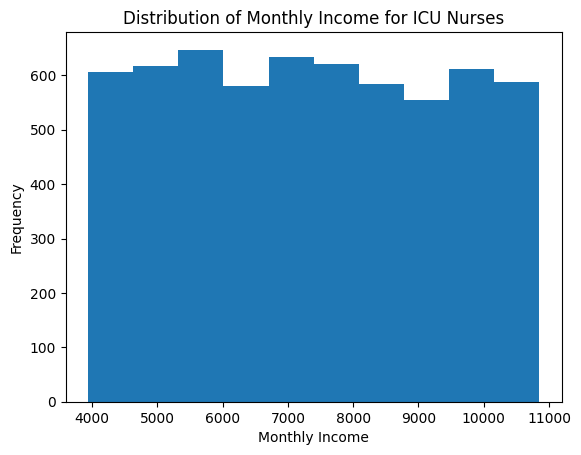

In [ ]:
# plot the distribution of jobrole == 'ICU nurse' , 'monthlyincome
# filter for ICU nurses
icu_nurses = health_attr[health_attr['jobrole'] == 'ICU nurse']

# Plot the distribution of monthly income for ICU nurses
plt.hist(icu_nurses['monthlyincome'], bins=10)
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Income for ICU Nurses')
plt.show()


<Axes: ylabel='Frequency'>

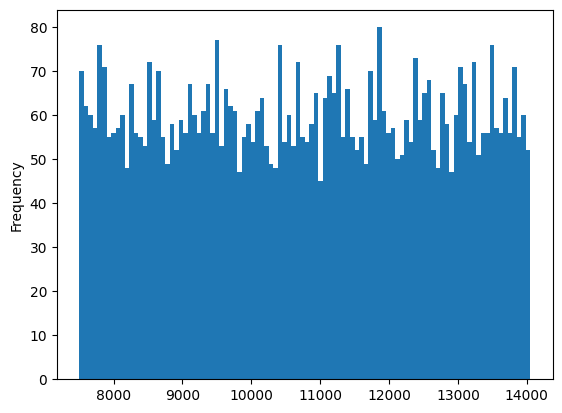

In [ ]:
# prompt: plot the distribution of the jobrole == pharmacist

health_attr[health_attr['jobrole'] == 'pharmacist']['monthlyincome'].plot(kind='hist', bins=100)


In [ ]:
nurse = health_attr.copy()